In [1]:
# %matplotlib widget
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import corner
from scipy.signal import find_peaks, peak_prominences

In [2]:
def custom_to_datetime(date_str, time_str):
    datetime_str = date_str + " " + time_str
    if time_str == "24:00:00":
        # Handle the special case of "24:00:00" by replacing it with "00:00:00" of the next day
        next_day = pd.to_datetime(date_str, format="%d/%m/%Y") + pd.Timedelta(days=1)
        datetime_str = next_day.strftime("%d/%m/%Y") + " 00:00:00"
    return pd.to_datetime(datetime_str, format="%d/%m/%Y %H:%M:%S")

In [3]:
data_tower_hamlets = '../data/2022-01-01-230802122803.csv'
df = pd.read_csv(data_tower_hamlets, skiprows=5, skipfooter=1, engine='python') 
df = df.drop('Unnamed: 14', axis=1)
df["DateTime"] = df.apply(lambda row: custom_to_datetime(row["End Date"], row["End Time"]), axis=1)

data_tower_soton = '../data/2022-01-01-230802132242.csv'
df2 = pd.read_csv(data_tower_soton, skiprows=5, skipfooter=1, engine='python') 
df2 = df2.drop('Unnamed: 22', axis=1)
df2["DateTime"] = df2.apply(lambda row: custom_to_datetime(row["End Date"], row["End Time"]), axis=1)

In [4]:
# There are some NAN values that can be seen via
# df[df['NO'].isna()]

In [5]:
df.head()

,End Date,End Time,M_DIR,Status/units,M_SPED,Status/units.1,M_T,Status/units.2,NO,Status/units.3,NO2,Status/units.4,NOXasNO2,Status/units.5,DateTime
0,01/01/2022,01:00:00,213.0,P deg,2.9,P ms-1,10.4,P degC,0.87311,R ugm-3,10.32750,R ugm-3,11.66625,R ugm-3,2022-01-01 01:00:00
1,01/01/2022,02:00:00,217.4,P deg,3.5,P ms-1,10.4,P degC,1.87095,R ugm-3,8.03250,R ugm-3,11.09250,R ugm-3,2022-01-01 02:00:00
2,01/01/2022,03:00:00,218.8,P deg,3.6,P ms-1,10.5,P degC,1.24730,R ugm-3,6.12000,R ugm-3,8.03250,R ugm-3,2022-01-01 03:00:00
3,01/01/2022,04:00:00,214.9,P deg,3.9,P ms-1,11.0,P degC,0.99784,R ugm-3,4.39875,R ugm-3,6.12000,R ugm-3,2022-01-01 04:00:00
4,01/01/2022,05:00:00,211.0,P deg,4.3,P ms-1,11.9,P degC,0.74838,R ugm-3,5.16375,R ugm-3,6.12000,R ugm-3,2022-01-01 05:00:00


In [6]:
df2.head()

,End Date,End Time,PM10,Status/units,M_DIR,Status/units.1,M_SPED,Status/units.2,M_T,Status/units.3,...,Status/units.5,NOXasNO2,Status/units.6,O3,Status/units.7,PM25,Status/units.8,SO2,Status/units.9,DateTime
0,01/01/2022,01:00:00,35.650,R ugm-3 (FIDAS),205.3,P deg,3.5,P ms-1,11.0,P degC,...,R ugm-3,14.85821,R ugm-3,38.18439,R ugm-3,27.594,R ugm-3 (Ref.eq),0.50151,R ugm-3,2022-01-01 01:00:00
1,01/01/2022,02:00:00,19.525,R ugm-3 (FIDAS),205.2,P deg,3.9,P ms-1,10.9,P degC,...,R ugm-3,7.80784,R ugm-3,46.10067,R ugm-3,13.679,R ugm-3 (Ref.eq),0.66868,R ugm-3,2022-01-01 02:00:00
2,01/01/2022,03:00:00,17.400,R ugm-3 (FIDAS),192.7,P deg,4.0,P ms-1,10.8,P degC,...,R ugm-3,14.50861,R ugm-3,42.35873,R ugm-3,11.557,R ugm-3 (Ref.eq),0.62688,R ugm-3,2022-01-01 03:00:00
3,01/01/2022,04:00:00,15.325,R ugm-3 (FIDAS),192.9,P deg,4.8,P ms-1,11.2,P degC,...,R ugm-3,11.75547,R ugm-3,44.75357,R ugm-3,9.882,R ugm-3 (Ref.eq),0.25076,R ugm-3,2022-01-01 04:00:00
4,01/01/2022,05:00:00,12.675,R ugm-3 (FIDAS),195.4,P deg,5.0,P ms-1,11.1,P degC,...,R ugm-3,17.52395,R ugm-3,37.31959,R ugm-3,8.326,R ugm-3 (Ref.eq),0.25076,R ugm-3,2022-01-01 05:00:00


In [7]:
# Checking Correlated Values
corr = df.corr()
corr.style.format('{:.2f}').background_gradient(cmap='coolwarm')

,M_DIR,M_SPED,M_T,NO,NO2,NOXasNO2
M_DIR,1.00,0.13,-0.05,-0.01,-0.07,-0.03
M_SPED,0.13,1.00,0.17,-0.30,-0.49,-0.40
M_T,-0.05,0.17,1.00,-0.33,-0.42,-0.39
NO,-0.01,-0.30,-0.33,1.00,0.69,0.96
NO2,-0.07,-0.49,-0.42,0.69,1.00,0.86
NOXasNO2,-0.03,-0.40,-0.39,0.96,0.86,1.00


In [8]:
# Checking Correlated Values
corr = df2.corr()
corr.style.format('{:.2f}').background_gradient(cmap='coolwarm')

,PM10,M_DIR,M_SPED,M_T,NO,NO2,NOXasNO2,O3,PM25,SO2
PM10,1.00,-0.26,-0.05,-0.15,0.29,0.38,0.36,-0.06,0.94,0.27
M_DIR,-0.26,1.00,0.13,-0.04,-0.05,-0.07,-0.06,-0.04,-0.27,-0.06
M_SPED,-0.05,0.13,1.00,0.10,-0.22,-0.31,-0.28,0.35,-0.13,-0.12
M_T,-0.15,-0.04,0.10,1.00,-0.25,-0.30,-0.30,0.38,-0.28,-0.10
NO,0.29,-0.05,-0.22,-0.25,1.00,0.55,0.95,-0.44,0.31,0.66
NO2,0.38,-0.07,-0.31,-0.30,0.55,1.00,0.78,-0.54,0.38,0.39
NOXasNO2,0.36,-0.06,-0.28,-0.30,0.95,0.78,1.00,-0.53,0.37,0.64
O3,-0.06,-0.04,0.35,0.38,-0.44,-0.54,-0.53,1.00,-0.15,-0.18
PM25,0.94,-0.27,-0.13,-0.28,0.31,0.38,0.37,-0.15,1.00,0.27
SO2,0.27,-0.06,-0.12,-0.10,0.66,0.39,0.64,-0.18,0.27,1.00


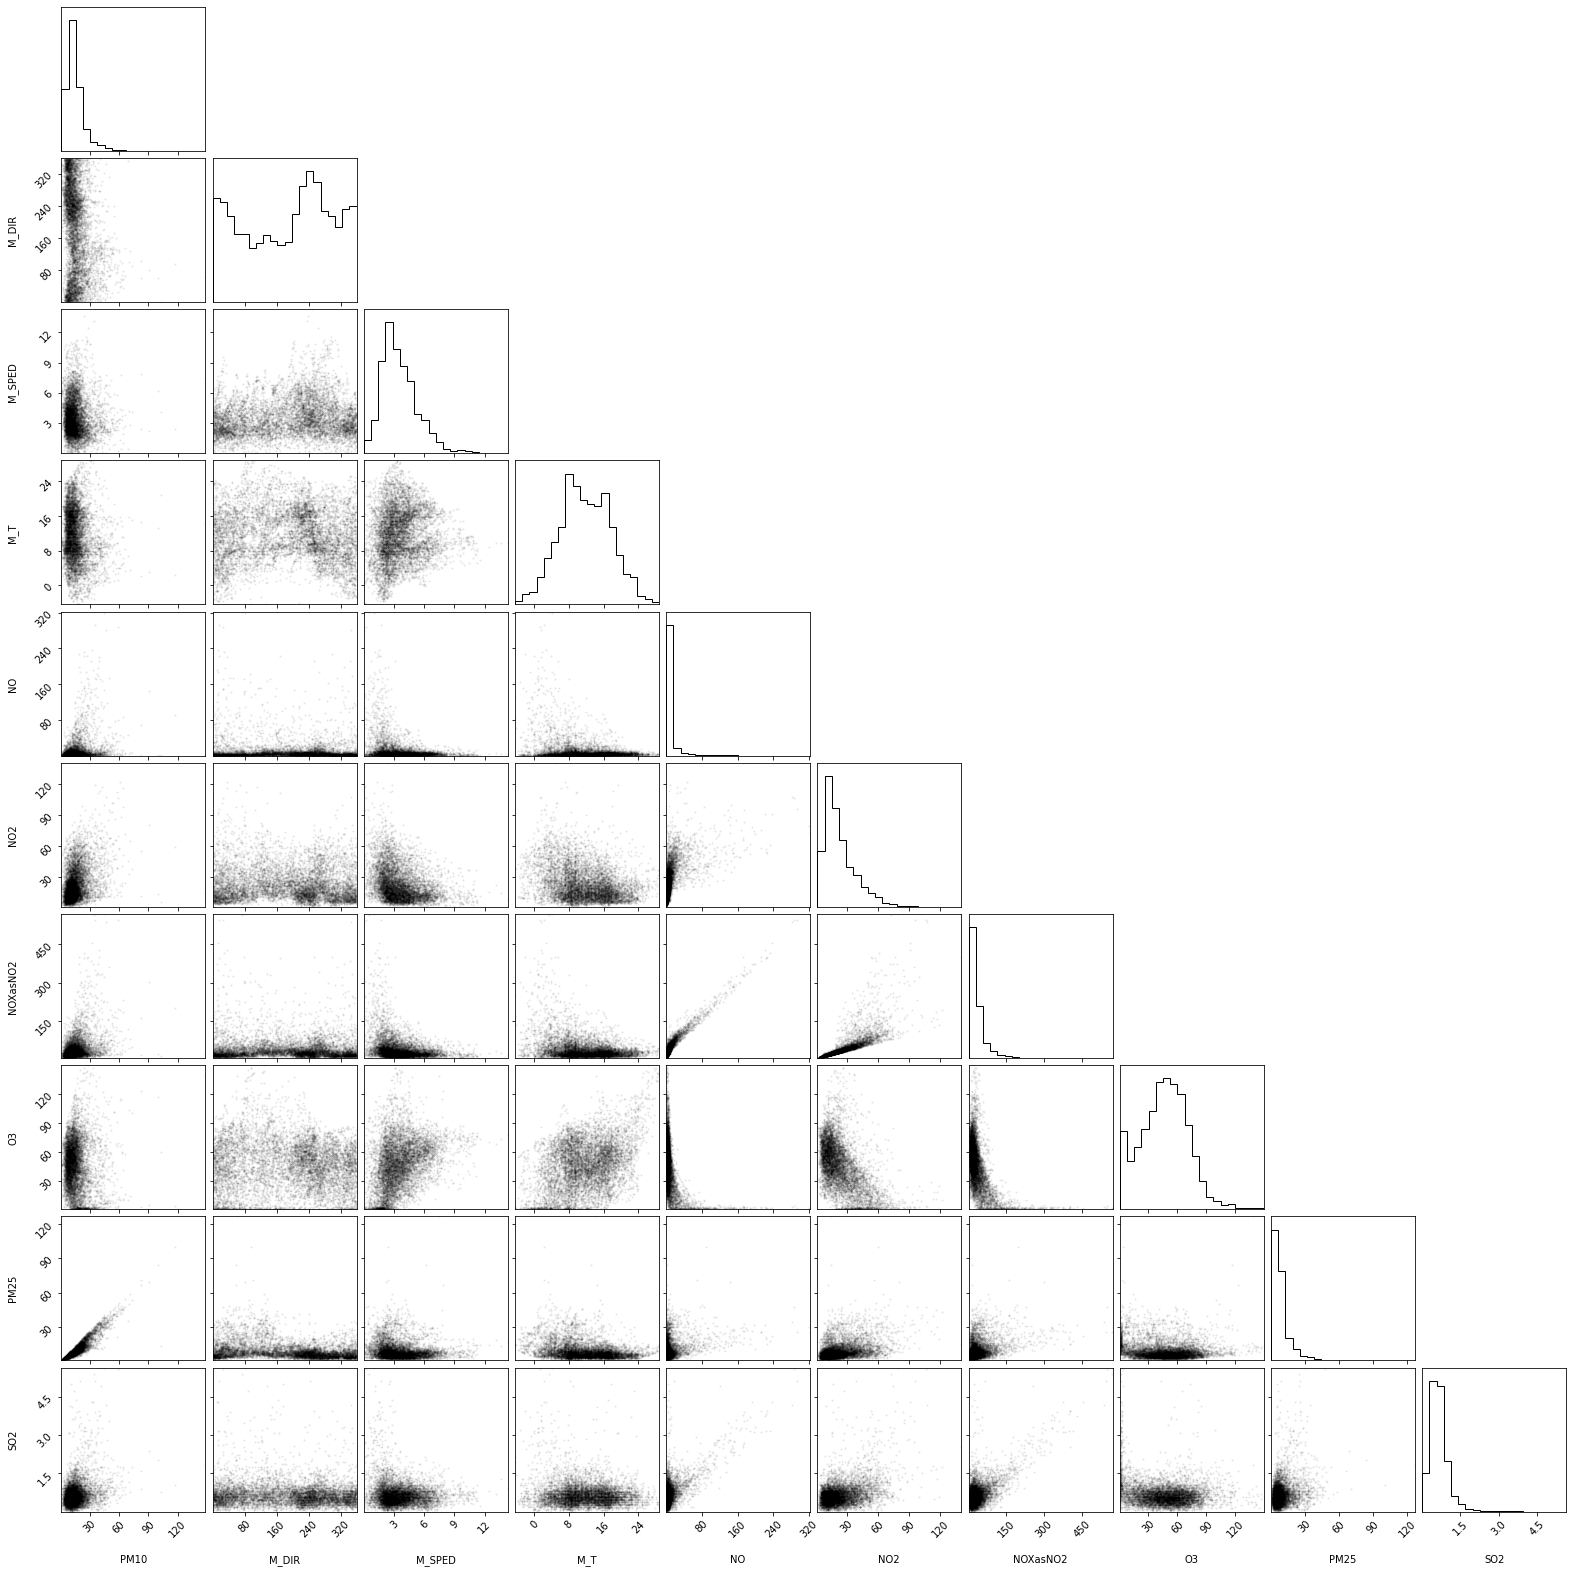

In [22]:
df_numeric = df2.select_dtypes(include='number')
#df_numeric = df_numeric.fillna(0)
#df_numeric = df_numeric.dropna()
df_numeric = df_numeric.interpolate()
corner.corner(df_numeric, facecolor='white', labels=df_numeric.columns, plot_contours=False, plot_density=False)
plt.show()

/tmp/ipykernel_7149/4221681411.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


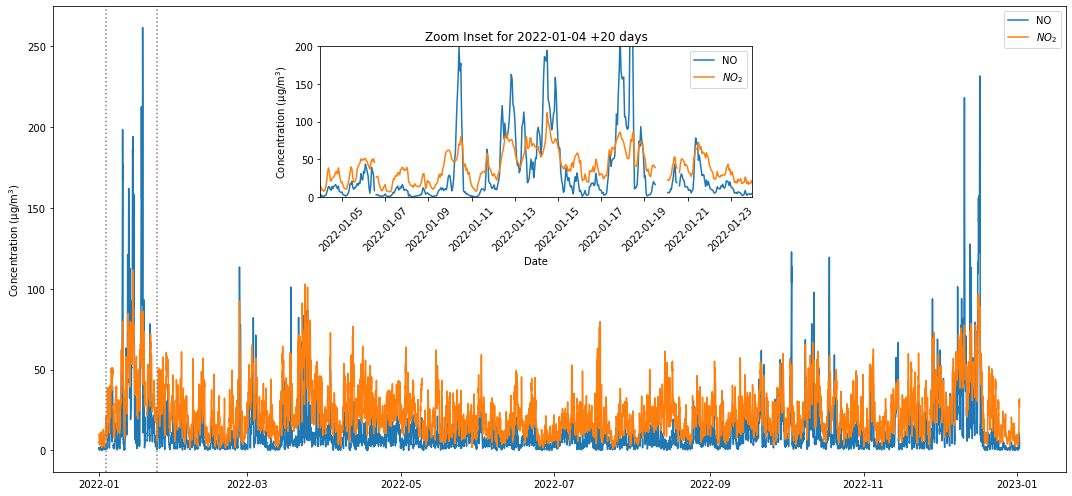

In [23]:
plt.figure(figsize=(15, 7))
plt.plot(df["DateTime"], df['NO'], label='NO')
plt.plot(df["DateTime"], df['NO2'], label='$NO_2$')
plt.ylabel(r'Concentration ($\mathrm{\mu g/m^3}$)')
plt.legend()

zoom_date = pd.to_datetime("2022-01-04")
days_offset = 20

plt.axvline(zoom_date, color='gray', linestyle='dotted', label='Zoom Start')
plt.axvline(zoom_date+ pd.Timedelta(days=days_offset), color='gray', linestyle='dotted', label='Zoom Start')

# Inset figure
plt.axes([0.3, 0.6, 0.4, 0.3])  # [left, bottom, width, height]
plt.plot(df["DateTime"], df['NO'], label='NO')
plt.plot(df["DateTime"], df['NO2'], label='$NO_2$')
plt.xlim(zoom_date, zoom_date + pd.Timedelta(days=days_offset))
plt.ylim(0, 200)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel(r'Concentration ($\mathrm{\mu g/m^3}$)')
plt.title(f'Zoom Inset for {zoom_date.date()} +{days_offset} days')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
hours_to_plot = [2, 6, 8, 12, 24]

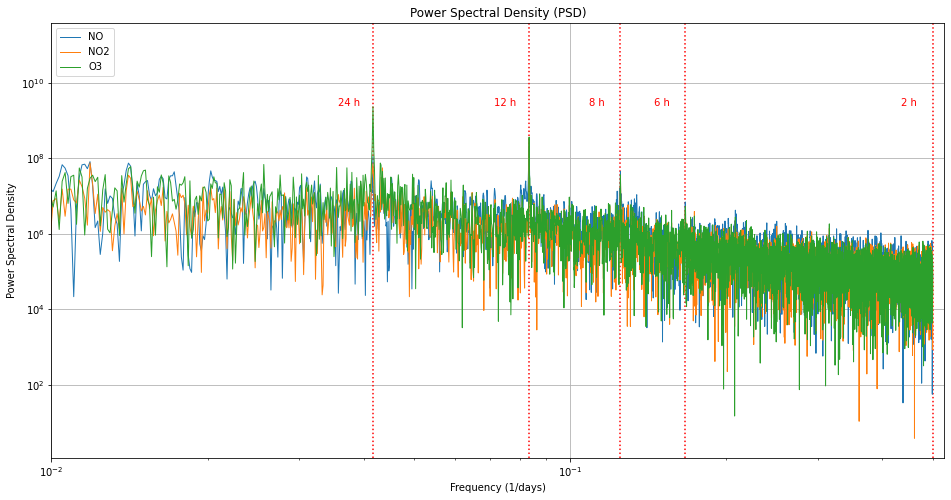

In [50]:
plt.figure(figsize=(16, 8))

for t in hours_to_plot:
    freq = 1/t
    plt.axvline(freq, color='red', ls='dotted')
    plt.text(0.9*freq, 3e9, f'{t} h', color='red', ha='center', va='center')


for metric in ['NO', 'NO2', 'O3']:
    y = df_numeric[metric]
    psd = np.abs(np.fft.fft(y))**2
    freqs = np.fft.fftfreq(len(df_numeric), 1) #1 Hour Cycle
    assert len(freqs) == len(psd)
    N_freqs = len(freqs)
    freqs = freqs[:N_freqs//2] # Cut data at the Nyquist
    psd   = psd[:N_freqs//2]
    
    plt.loglog(freqs, psd, label=metric, lw=1.0)


plt.xlabel('Frequency (1/days)')
plt.ylabel('Power Spectral Density')
plt.title(f'Power Spectral Density (PSD)')

plt.xlim(1e-2, 1/1.9)
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Lorentzian decomposition of power spectra

In [66]:
def lorentzian(f, R, Q, f_0):
    """
    Calculate the value of a Lorentzian function at a given frequency.

    The Lorentzian function is used to describe the spectral line shape of certain
    physical systems, particularly in spectroscopy and signal processing.

    The formula for the Lorentzian function is given by:
    L(f) = (1/π) * ((R**2 * Q * f_0) / (f_0**2 + Q**2 * (f - f_0)**2))

    Parameters:
        f (float or array-like): The frequency or an array of frequencies at which
            to evaluate the Lorentzian function.
        R (float): The peak amplitude of the Lorentzian function.
        Q (float): The quality factor, which controls the width of the peak.
        f_0 (float): The center frequency of the Lorentzian function.

    Returns:
        float or array-like: The value(s) of the Lorentzian function evaluated at
        the given frequency or frequencies.

    Example:
        >>> lorentzian(2.0, 1.0, 0.5, 3.0)
        0.05161781938115525
    """
    return (1 / np.pi) * ((R ** 2 * Q * f_0) / (f_0 ** 2 + Q ** 2 * (f - f_0) ** 2))

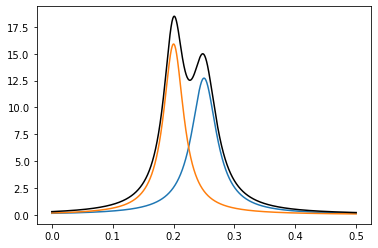

In [125]:
l1 = lorentzian(freqs, R=1.0, Q=10, f_0=0.25)
l2 = lorentzian(freqs, R=1.0, Q=10, f_0=0.2)
data = l1 + l2
plt.plot(freqs, l1)
plt.plot(freqs, l2)
plt.plot(freqs, data, color='black')

In [68]:
from scipy.optimize import minimize

In [74]:
from lmfit import Model

In [117]:
N_lorentzians = 2
model = Model(lorentzian, prefix='lor1_')
for i in range(1, N_lorentzians):
    model = model + Model(lorentzian, prefix=f'lor{i+1}_')

params = model.make_params()
params

name,value,initial value,min,max,vary
lor1_R,-inf,None,-inf,inf,True
lor1_Q,-inf,None,-inf,inf,True
lor1_f_0,-inf,None,-inf,inf,True
lor2_R,-inf,None,-inf,inf,True
lor2_Q,-inf,None,-inf,inf,True
lor2_f_0,-inf,None,-inf,inf,True


In [121]:
init = model.eval(params, f=np.linspace(0,100,100))
init

/tmp/ipykernel_7149/235194584.py:26: RuntimeWarning: invalid value encountered in true_divide
  return (1 / np.pi) * ((R ** 2 * Q * f_0) / (f_0 ** 2 + Q ** 2 * (f - f_0) ** 2))


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [127]:
model.fit(data, f=freqs)

/tmp/ipykernel_7149/235194584.py:26: RuntimeWarning: invalid value encountered in true_divide
  return (1 / np.pi) * ((R ** 2 * Q * f_0) / (f_0 ** 2 + Q ** 2 * (f - f_0) ** 2))


ValueError: The model function generated NaN values and the fit aborted! Please check your model function and/or set boundaries on parameters where applicable. In cases like this, using "nan_policy='omit'" will probably not work.

In [100]:
params

name,value,initial value,min,max,vary
lor1_R,-inf,None,-inf,inf,True
lor1_Q,-inf,None,-inf,inf,True
lor1_f_0,-inf,None,-inf,inf,True
lor2_R,-inf,None,-inf,inf,True
lor2_Q,-inf,None,-inf,inf,True
lor2_f_0,-inf,None,-inf,inf,True


In [ ]:
def fcn2min(params, x, data):
    """Model a decaying sine wave and subtract data."""
    amp   = params['amp']
    shift = params['shift']
    omega = params['omega']
    decay = params['decay']
    
    model = amp * np.sin(x*omega + shift) * np.exp(-x*x*decay)
    
    return model - data


In [101]:
minner = Minimizer(fcn2min, params, fcn_args=(x, data))

NameError: name 'Minimizer' is not defined

In [79]:
from numpy import exp, sin

def residual(variables, x, data, uncertainty):
    """Model a decaying sine wave and subtract data."""
    amp = variables[0]
    phaseshift = variables[1]
    freq = variables[2]
    decay = variables[3]

    model = amp * sin(x*freq + phaseshift) * exp(-x*x*decay)

    return (data-model) / uncertainty

In [80]:
from numpy import linspace, random
from scipy.optimize import leastsq

# generate synthetic data with noise
x = linspace(0, 100)
noise = random.normal(size=x.size, scale=0.2)
data = 7.5 * sin(x*0.22 + 2.5) * exp(-x*x*0.01) + noise

# generate experimental uncertainties
uncertainty = abs(0.16 + random.normal(size=x.size, scale=0.05))

variables = [10.0, 0.2, 3.0, 0.007]
out = leastsq(residual, variables, args=(x, data, uncertainty))

In [86]:
out[0]

array([6.65764862, 0.71399939, 2.84109771, 0.00811493])

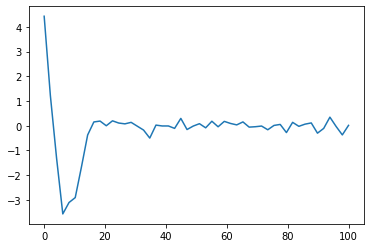

In [87]:
plt.plot(x,data)